# A look at our data

### General game statistics

Mean, median (mode for binary).

SD, range, IQR (spread of middle 50%)

Shape: skewness (distribution symmetric or skewed) and kurtosis (distribution heavy or light tailed)

Frequency tables/proportions (for cat indicators such as turnovers).

Plots to visualize patterns, distributions, and relationships. Univariate: hist for continuous vars, bar for cat vars, box for comparing between groups. Bivariate: scat, line plots (if data is temporal), heatmaps/corr matrices

#### Normality & Assumption Checks (If Needed)
Even in exploratory work, it's wise to check distributional assumptions if you’re:
- Summarizing with means and SD
- Comparing group means
- Planning to build models (like regression)

How to check:
- Visual: Histograms, QQ-plots
- Statistical: Shapiro-Wilk test, Kolmogorov-Smirnov test
    - Note: These are sensitive to large samples, so interpret with plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_datapoints = (605 + 534 + 538 + 520 + 748 + 566 + 542 + 727 + 672 + 556 + 658 + 618 + 631 + 556 + 445 + 540) / 16
mean_datapoints

591.0

In [3]:
df = pd.read_csv("data/cleaned/game_stats.csv")
df

,game_id,a_total_minutes,b_total_minutes,first_half_dur,second_half_dur,total_timeout_duration,total_gametime_excl_breaks,total_gametime
0,1,50.921667,35.447217,36.672783,57.813900,4.981683,94.403655,99.836117
1,2,50.961100,21.353350,32.614450,52.433333,9.304433,84.892709,89.830000
2,3,41.156100,45.059467,40.298883,50.607217,3.924983,90.840684,93.627217
3,4,42.016667,37.284450,47.868883,37.803900,5.390550,85.582941,89.124450
4,5,35.175567,51.821650,39.573883,58.556100,5.442217,98.039280,100.186100
5,6,51.082200,38.441150,56.200000,39.531117,5.331100,95.642265,100.240000
6,7,40.337200,25.478900,40.380550,37.930000,10.847233,78.129763,83.137767
7,8,51.335000,45.543317,67.669433,40.992767,10.447233,108.488079,112.937767
8,9,44.668883,36.549467,80.008333,33.767783,30.232217,113.272246,117.736117
9,10,31.509967,34.710583,40.162217,32.356667,4.051667,72.451356,75.862767


In [4]:
df.describe()

,game_id,a_total_minutes,b_total_minutes,first_half_dur,second_half_dur,total_timeout_duration,total_gametime_excl_breaks,total_gametime
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,8.500000,42.599099,38.156734,47.463646,44.099654,8.741736,91.417604,95.753923
std,4.760952,6.957834,9.359306,13.608555,8.451541,6.429649,11.997628,12.091576
min,1.000000,31.509967,21.353350,32.186117,32.356667,3.924983,71.036002,75.862767
25%,4.750000,36.798104,34.213075,38.848608,38.092500,5.375687,84.322652,88.337229
50%,8.500000,41.586383,36.916958,44.124717,41.005275,6.003617,92.622169,97.231950
75%,12.250000,50.931525,45.180429,56.605558,51.063746,10.084733,98.436835,101.830700
max,16.000000,52.541133,56.894383,80.008333,58.556100,30.232217,113.272246,117.736117


In [5]:
mean_time_all_teams = (df['a_total_minutes'].mean() + df['b_total_minutes'].mean()) / 2
print(f'The average that each team was on offense is {mean_time_all_teams:.1f} minutes.')

The average that each team was on offense is 40.4 minutes.


In [7]:
print(f'On average, the first half took {df['first_half_dur'].mean():.1f} minutes and the second half took {df['second_half_dur'].mean():.1f} minutes.')

SyntaxError: f-string: unmatched '[' (3329787792.py, line 1)

In [8]:
print(f'On average, the total gametime was {df['total_gametime'].mean():.1f} minutes for each game, and {df['total_gametime_excl_breaks'].mean():.1f} minutes excluding the breaks (half time, timeouts).')

SyntaxError: f-string: unmatched '[' (4220823429.py, line 1)

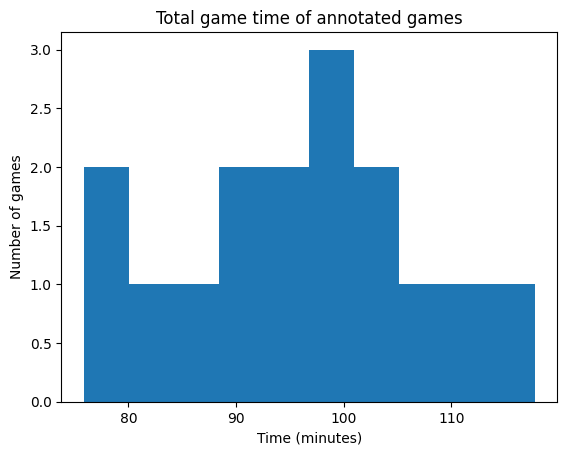

In [10]:
x = df['total_gametime']
y = df['game_id']

plt.hist(x)
# plt.plot(y, x)
plt.xlabel('Time (minutes)')
plt.ylabel('Number of games')
plt.title('Total game time of annotated games')
plt.show()

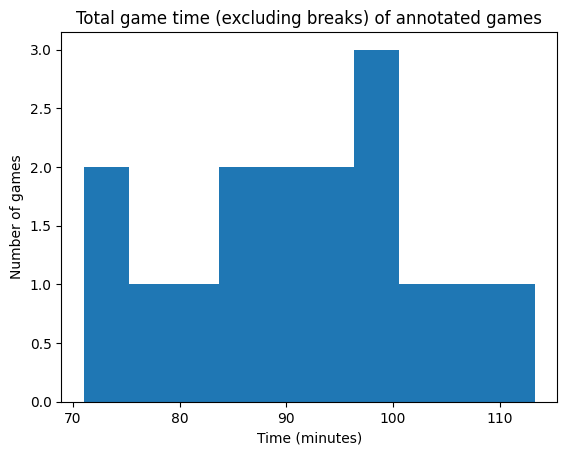

In [11]:
x = df['total_gametime_excl_breaks']
y = df['game_id']

plt.hist(x)
plt.xlabel('Time (minutes)')
plt.ylabel('Number of games')
plt.title('Total game time (excluding breaks) of annotated games')
plt.show()

### Description of team-based indicator data

In [12]:
df = pd.read_csv("data/cleaned/summary_indicators.csv")
df

,team_id,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,poss_eff,pass_rate,poss_dur
0,01_teamA,1,15,18,83.333333,53.940355,94.832827,10,5,15,17,1,14.733333,6.460904,101.843333
1,01_teamB,0,14,21,66.666667,37.548564,87.394958,7,8,15,16,1,3.285714,3.357104,73.339069
2,02_teamA,1,15,17,88.235294,60.030008,96.078431,3,7,10,16,1,9.733333,5.003817,122.306640
3,02_teamB,0,7,15,46.666667,25.153338,88.194444,6,11,17,16,1,6.285714,6.743673,53.383375
4,03_teamA,0,14,18,77.777778,45.305802,90.960452,8,8,16,15,1,4.142857,4.300699,82.312200
5,03_teamB,1,15,21,71.428571,49.602738,91.584158,11,5,16,16,1,6.600000,4.482965,87.211871
6,04_teamA,0,13,16,81.250000,49.094675,95.454545,7,4,11,15,1,8.846154,5.759619,105.041667
7,04_teamB,1,15,19,78.947368,43.565283,92.957746,6,4,10,13,1,5.866667,3.808558,89.482680
8,05_teamA,0,11,18,61.111111,35.879055,89.805825,9,12,21,16,1,7.818182,5.856338,65.954188
9,05_teamB,1,15,18,83.333333,52.858048,95.502646,4,13,17,14,1,14.866667,7.294249,97.165594


In [13]:
df.describe()

,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,poss_eff,pass_rate,poss_dur
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.500000,12.500000,17.593750,71.446564,44.273481,91.905678,6.90625,8.968750,15.875000,15.656250,0.500000,8.375752,5.459538,86.225910
std,0.508001,2.972997,3.171032,14.849228,7.945732,3.688935,2.51908,3.702522,4.831015,2.731056,0.508001,4.379214,1.425948,18.386799
min,0.000000,6.000000,11.000000,40.000000,25.153338,79.245283,2.00000,4.000000,6.000000,7.000000,0.000000,2.083333,3.125309,53.383375
25%,0.000000,10.000000,15.000000,60.833333,39.095909,90.463879,5.75000,6.000000,11.000000,15.000000,0.000000,5.775000,4.463471,71.345324
50%,0.500000,14.000000,18.000000,73.214286,44.112520,91.878531,6.50000,8.500000,16.000000,16.000000,0.500000,6.633333,5.010751,87.607364
75%,1.000000,15.000000,19.250000,83.333333,50.071326,94.850735,8.25000,12.000000,19.000000,17.000000,1.000000,9.583333,6.217461,97.615422
max,1.000000,15.000000,24.000000,100.000000,60.030008,98.309859,12.00000,18.000000,25.000000,20.000000,1.000000,18.600000,8.808929,126.098720


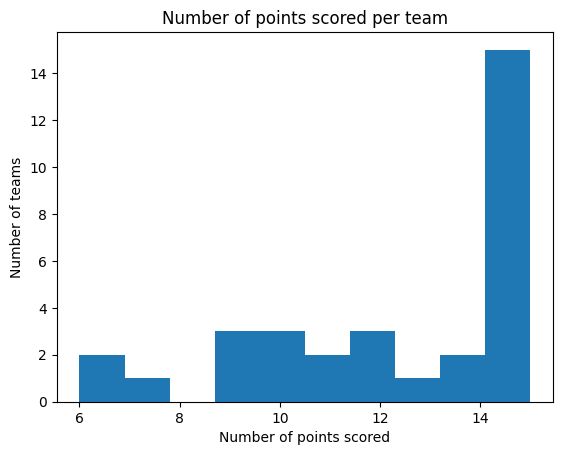

In [14]:
x = df['points_scored']
# y = df['game_id']

plt.hist(x)
plt.xlabel('Number of points scored')
plt.ylabel('Number of teams')
plt.title('Number of points scored per team')
plt.show()

In [15]:
winners = df[df['win'] == 1]
losers = df[df['win'] == 0]

In [16]:
winners.describe()

,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,poss_eff,pass_rate,poss_dur
count,16.0,16.00,16.000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000
mean,1.0,14.75,19.125,78.324503,49.363206,93.597651,5.93750,8.062500,14.000000,15.87500,0.500000,9.375758,5.331082,94.764592
std,0.0,1.00,2.500,11.359628,6.541059,2.314389,2.67005,3.974397,4.501851,1.78419,0.516398,4.040759,1.414875,16.630807
min,1.0,11.00,15.000,57.894737,32.266921,90.683230,2.00000,4.000000,6.000000,13.00000,0.000000,5.400000,3.655897,69.936294
25%,1.0,15.00,17.750,69.875776,46.653861,91.646040,4.75000,5.000000,10.750000,15.50000,0.000000,6.266667,4.365756,86.505403
50%,1.0,15.00,18.500,81.140351,50.539914,93.083812,6.00000,7.000000,14.500000,16.00000,0.500000,7.933333,4.921920,94.432486
75%,1.0,15.00,20.250,84.558824,53.542327,95.518113,6.00000,9.500000,17.000000,16.25000,1.000000,11.292424,6.207118,102.243583
max,1.0,15.00,24.000,100.000000,60.030008,98.309859,11.00000,18.000000,24.000000,20.00000,1.000000,18.600000,8.808929,126.098720


In [17]:
losers.describe()

,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,poss_eff,pass_rate,poss_dur
count,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.0,10.250000,16.062500,64.568626,39.183755,90.213705,7.875000,9.875000,17.75000,15.437500,0.500000,7.375747,5.587994,77.687227
std,0.0,2.542964,3.086935,15.024595,5.694576,4.081673,1.995829,3.283799,4.52401,3.482695,0.516398,4.601353,1.471440,16.326785
min,0.0,6.000000,11.000000,40.000000,25.153338,79.245283,4.000000,4.000000,8.00000,7.000000,0.000000,2.083333,3.125309,53.383375
25%,0.0,9.000000,14.750000,55.823864,36.333378,88.085633,7.000000,8.000000,15.75000,15.000000,0.000000,5.202381,4.818286,66.851467
50%,0.0,10.000000,15.500000,61.805556,39.411305,90.383139,7.500000,9.500000,18.00000,16.000000,0.500000,6.342857,5.388281,73.870647
75%,0.0,12.000000,18.000000,78.333333,42.357815,92.686581,9.000000,12.000000,21.25000,18.000000,1.000000,8.075175,6.307389,89.419126
max,0.0,14.000000,22.000000,90.909091,49.094675,95.467422,12.000000,15.000000,25.00000,19.000000,1.000000,18.300000,8.104075,106.674346


In [18]:
# Ensure both are sorted in the same order (e.g., by team_id)
winners_sorted = winners.sort_values("team_id").reset_index(drop=True)
losers_sorted = losers.sort_values("team_id").reset_index(drop=True)

# Select only numeric indicator columns (exclude identifiers like team_id, win, etc.)
exclude_cols = ["team_id", "win"]
indicator_cols = [col for col in winners.columns if col not in exclude_cols]

# Compute difference scores: Δ = winner - loser for each row and indicator
differences = winners_sorted[indicator_cols] - losers_sorted[indicator_cols]

# Compute mean and SD of those deltas
delta_means = differences.mean()
delta_sds = differences.std(ddof=1)  # ddof=1 gives sample SD (correct for t-tests)

# Create a summary DataFrame with the results
delta_summary = pd.DataFrame({
    'M_Δ': delta_means,
    'SD_Δ': delta_sds
})


In [19]:
delta_summary

,M_Δ,SD_Δ
points_scored,4.500000,2.708013
score_attempts,3.062500,3.395463
score_efficiency,13.755877,19.944637
disc_possession,10.179452,10.917136
pass_acc,3.383947,4.529552
f_turnover,-1.937500,2.999305
uf_turnover,-1.812500,2.857009
total_turnover,-3.750000,2.620433
subs,0.437500,3.932239
early_win,0.000000,0.000000
